<h1 style="font-family: Ubuntu; padding: 2%; font-size: 35px; font-weight: lighter;">Organizing the images into their respective directories</h1>
<h4 style="font-family: Ubuntu; padding: 2%; font-size: 16px; font-weight: lighter;">This notebook is intended to create images from their respective pixel array provided in the <code>.csv</code> file and organize these images in the respective directories.</h4>

<h4 style="font-family: Ubuntu; padding: 2%; font-size: 25px; font-weight: lighter;">Importing necessary libraries</h4>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import PIL
import os
%matplotlib inline

<h4 style="font-family: Ubuntu; padding: 2%; font-size: 25px; font-weight: lighter;">Having a look at the data</h4>

In [2]:
data = pd.read_csv('../data/fer2013.csv')

In [4]:
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [4]:
pd.value_counts(data["emotion"])#angry, disgust, fear, happy, sad, surprise, neutral

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

<h4 style="font-family: Ubuntu; padding: 2%; font-size: 25px; font-weight: lighter;">A function to plot the images</h4>

In [23]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

<h4 style="font-family: Ubuntu; padding: 2%; font-size: 25px; font-weight: lighter;">Getting the emotions and making respective directories</h4>
<p style="font-family: Ubuntu; padding-left:2%;">Note: please do not run this node more than once. This is just to create the respective directories.</p>

In [2]:
emotions = "angry, disgust, fear, happy, sad, surprise, neutral".split(", ")
for i in emotions:
    os.system('mkdir ../data/train/' + i)
    os.system('mkdir ../data/test/' + i)
    os.system('mkdir ../data/validate/' + i)
print(emotions)

<h4 style="font-family: Ubuntu; padding: 2%; font-size: 25px; font-weight: lighter;">A function to save the image to their respective directory based on the class</h4>

In [17]:
def insertImage(nparray, path, emotion, count):
    img = PIL.Image.fromarray(nparray)
    img.save(path + "/" + emotion + str(count) + ".jpg")

In [18]:
img_count = [1 for i in emotions]
print(img_count)
target_dirs = dict(zip(data["Usage"].unique(), ['train', 'test', 'validate']))
print(target_dirs)

[1, 1, 1, 1, 1, 1, 1]
{'Training': 'train', 'PublicTest': 'test', 'PrivateTest': 'validate'}


<h4 style="font-family: Ubuntu; padding: 2%; font-size: 25px; font-weight: lighter;">organizing the images into their respective directories</h4>

In [19]:
for e, pxls, tgt in zip(data["emotion"], data["pixels"], data["Usage"]):
    image = np.array(list(map(int, pxls.split())))
    image = np.uint8(np.reshape(image, (48, 48)))
    insertImage(image, "data/" + target_dirs[tgt] + "/" + emotions[e], emotions[e], img_count[e])
#     print("data/" + target_dirs[tgt] + "/" + emotions[e] + "/" + emotions[e] + str(img_count[e]) + ".jpg")
    img_count[e] += 1
#     print(img_count)

<h4 style="font-family: Ubuntu; padding: 2%; font-size: 25px; font-weight: lighter;">A few images in the dataset</h4>

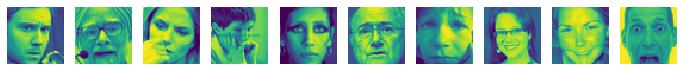

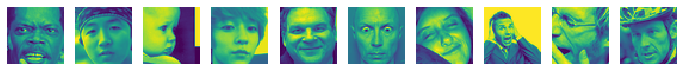

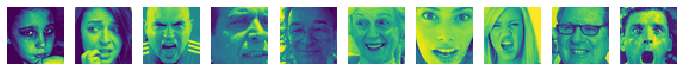

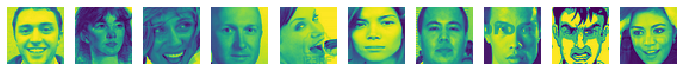

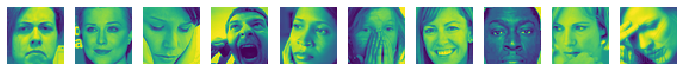

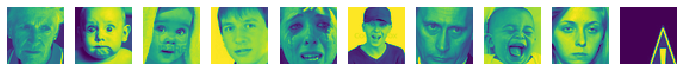

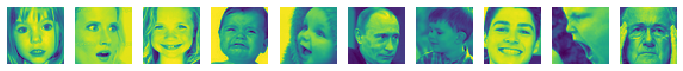

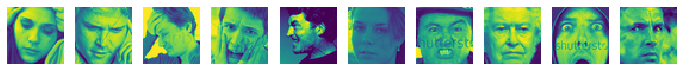

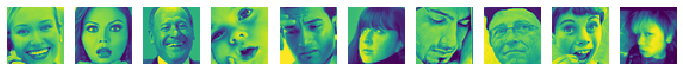

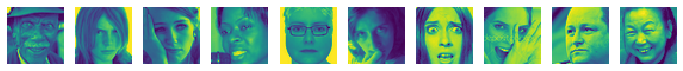

In [75]:
images = []

for pic in data.iloc[:100, 1]:
    image = np.array(list(map(int, pic.split())))
    image = np.uint8(np.reshape(image, (48, 48)))
    images.append(image)

images = np.array(images)
for i in range(10):
    plots(images[i * 10: i * 10 + 10])

<h4 style="font-family: Ubuntu; padding: 2%; font-size: 25px; font-weight: lighter;">Having a look at the image distribution over different directories</h4>

In [28]:
def get_total(emotions):
    train, test, validate = 0, 0, 0
    e_count = dict(zip(emotions, [0 for i in emotions]))
    for i in emotions:
        train += len(os.listdir("../data/train/" + i))
        e_count[i] += len(os.listdir("../data/train/" + i))
        test += len(os.listdir("../data/test/" + i))
        e_count[i] += len(os.listdir("../data/test/" + i))
        validate += len(os.listdir("../data/validate/" + i))
        e_count[i] += len(os.listdir("../data/validate/" + i))
        print("train-{0}: {1}\t test-{0}: {2}\t validate-{0}: {3}".format(i, len(os.listdir("data/train/" + i)), len(os.listdir("data/test/" + i)), len(os.listdir("data/validate/" + i))))

    print("train: {0}\t test: {1}\t validate: {2}".format(train, test, validate))
    return (train + test + validate), e_count

In [20]:
def plot_graph(total, data):
    # colors = ['#dc143c', '#808000', '#ffa500', '#009999', '#ffff00', '#009933', '#595959']
    colors = [(0 / 255, 102 / 255, 153 / 255, 0.25 + 2 * (data[i] / total)) for i in data]

    plt.subplots(figsize=(16, 12))
    plt.bar(data.keys(), data.values(), color=colors, edgecolor='#006699')
    plt.title('Data distribution over Classes', fontdict={'fontsize': '20'})
    plt.xlabel('Emotion Classes', fontdict={'fontsize': '20'})
    plt.ylabel('Image Count', fontdict={'fontsize': '20'})
    plt.show()

train-angry: 3995	 test-angry: 467	 validate-angry: 491
train-disgust: 3924	 test-disgust: 504	 validate-disgust: 495
train-fear: 4097	 test-fear: 496	 validate-fear: 528
train-happy: 7215	 test-happy: 895	 validate-happy: 879
train-sad: 4830	 test-sad: 653	 validate-sad: 594
train-surprise: 3171	 test-surprise: 415	 validate-surprise: 416
train-neutral: 4965	 test-neutral: 607	 validate-neutral: 626
train: 32197	 test: 4037	 validate: 4029


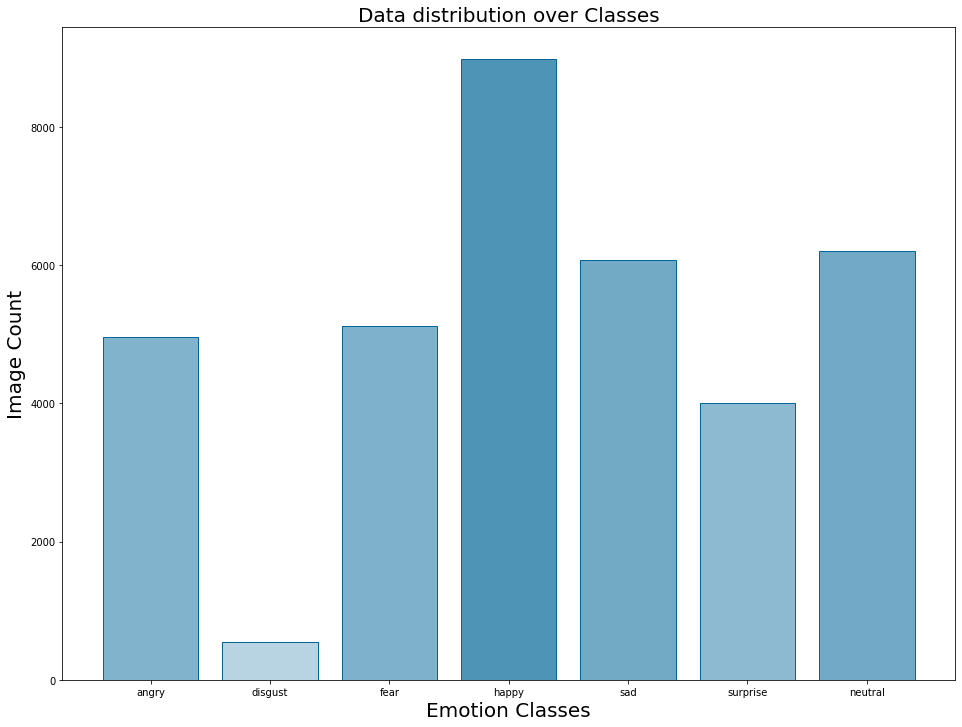

In [21]:
total, ecount = get_total(emotions)
plot_graph(total, e_count)

<h4 style="font-family: Ubuntu; padding: 2%; font-size: 25px; font-weight: lighter;">Data Augmentation</h4>
<p style="font-family: Ubuntu; padding: 2%;">Increasing the number of samples for disgust class</p>

In [12]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

for folder in 'train test validate'.split():
    for i in os.listdir("../data/" + folder + "/disgust"):
        img = cv2.imread("../data/" + folder + "/disgust/" + i)
        arr = np.array([img])
        # print(arr)
        gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.2, shear_range=10)
        itr = gen.flow(arr, batch_size=10)
        for k in range(8):
            aug_image = PIL.Image.fromarray(np.uint8(next(itr)[0]))
            aug_image.save(../"data/" + folder + "/disgust/" + i.split('.')[0] + "_aug" + str(k) + ".jpg")

In [29]:
total, ecount = get_total(emotions)

train-angry: 3995	 test-angry: 467	 validate-angry: 491
train-disgust: 3924	 test-disgust: 504	 validate-disgust: 495
train-fear: 4097	 test-fear: 496	 validate-fear: 528
train-happy: 7215	 test-happy: 895	 validate-happy: 879
train-sad: 4830	 test-sad: 653	 validate-sad: 594
train-surprise: 3171	 test-surprise: 415	 validate-surprise: 416
train-neutral: 4965	 test-neutral: 607	 validate-neutral: 626
train: 32197	 test: 4037	 validate: 4029


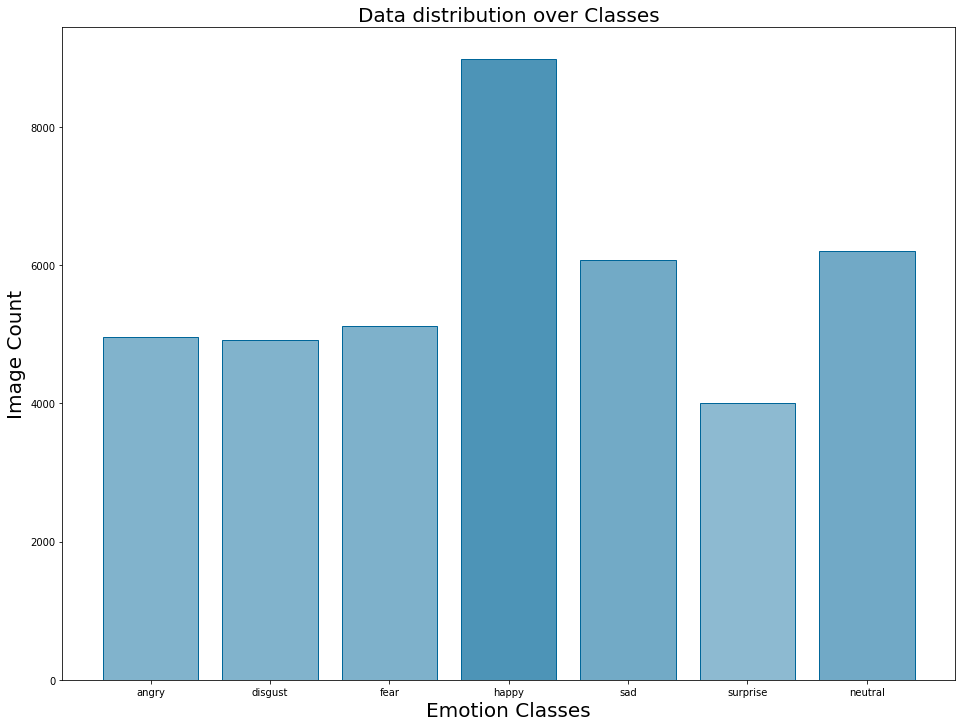

In [31]:
plot_graph(total, ecount)